# Introduction
The objective of this project is to build machine learining models to predict parameters in the wine dataset. The dataset is divided into 2 parts-one containing details of various red wine samples and the other containing white wine samples.

In the first part of the project, we take up a binary classification problem and try to predict the type of wine. In the second part, we attempt to make a multiclass classification of the wine quality. The dataset contains wine quality ratings from 3 to 9 and our challenge is to predict these on a test set.

We explore the data, study trends, preprocess it and then use models like Random Forest Classification, XGBoost and Neural networks. We fine-tune the models to achieve better performance.

# Loading the data and necessary libraries

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [598]:
red=pd.read_csv('/Users/emilbiju/Downloads/winequality-red.csv',sep=';')
white=pd.read_csv('/Users/emilbiju/Downloads/winequality-white.csv',sep=';')

In [599]:
red['Type']=0
white['Type']=1
data=pd.concat([red,white],axis=0,ignore_index=True)

In [42]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

#### There are no null values in the dataset

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [44]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Data Exploration

Text(0.5,1,'White')

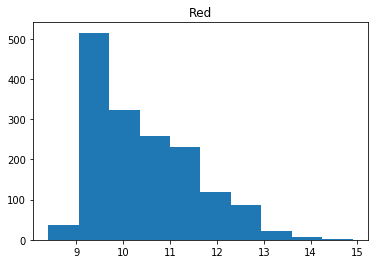

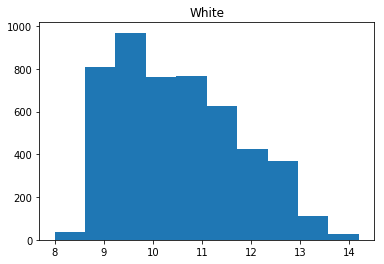

In [45]:
plt.figure()
plt.hist(red['alcohol'])
plt.title('Red')
plt.figure()
plt.hist(white['alcohol'])
plt.title('White')

#### Most wines have 9-10% alcohol. White wine has considerable number of samples in the 9-12% bracket

Text(0.5,1,'White')

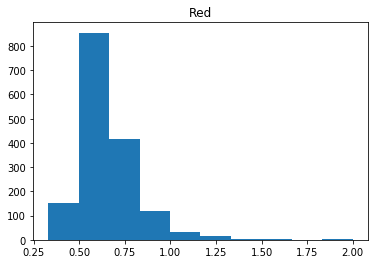

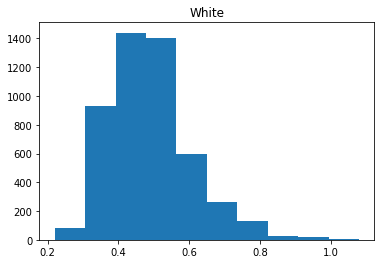

In [46]:
plt.figure()
plt.hist(red['sulphates'])
plt.title('Red')
plt.figure()
plt.hist(white['sulphates'])
plt.title('White')

#### Red wine has more sulphate content. The histogram goes up to 2g/dm^3

Text(0.5,1,'White')

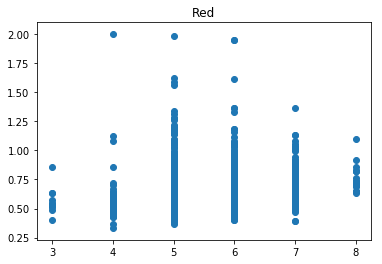

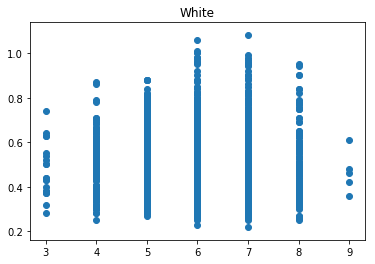

In [47]:
plt.figure()
plt.scatter(red['quality'],red['sulphates'])
plt.title('Red')
plt.figure()
plt.scatter(white['quality'],white['sulphates'])
plt.title('White')

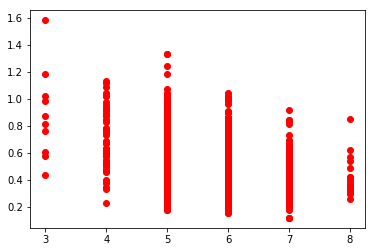

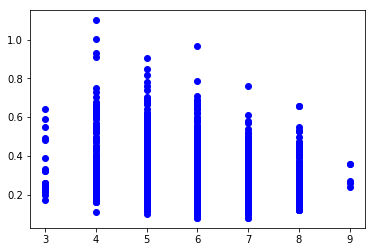

In [48]:
plt.figure()
plt.plot(red['quality'],red['volatile acidity'],'ro')
plt.figure()
plt.plot(white['quality'],white['volatile acidity'],'bo')

#### Note that higher quality wine has less volatile acidity

In [49]:
print(red.shape)
print(white.shape)

(1599, 13)
(4898, 13)


#### We see that we have a highly imbalanced dataset with almost 3 samples of white wine for every red wine sample

### Correlation plot

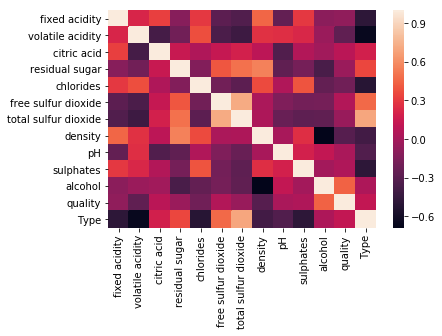

In [55]:
corr=data.corr()
import seaborn as sns
sns.heatmap(corr)

In [600]:
target=data['Type']
del data['Type']

# Data Preprocessing

### Splitting the data into train and test sets

In [601]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=123,test_size=0.3)

### Normalize all the features using StandardScaler
This is a very important step. The accuracy was noticed to have fallen from 98% to almost 74% while using XGBoost in the absence of this step.

In [602]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [603]:
X_train=pd.DataFrame(X_train,columns=data.columns)
X_test=pd.DataFrame(X_test,columns=data.columns) 

### Convert categorical variables to one-hot vectors
Since all our variables are numeric, this step is not needed

In [585]:
data.shape

(6497, 12)

# Predicting Wine type

## Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,max_depth=8)
model.fit(X_train,y_train)
preds=model.predict(X_test)
acc=accuracy_score(preds,y_test)

/Users/emilbiju/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [106]:
print("Accuracy score using Random Forest = "+str(acc))

Accuracy score using Random Forest = 0.9928205128205129


In [107]:
confusion_matrix(y_test,preds)

array([[ 479,   13],
       [   1, 1457]])

We clearly see some signs of over-fitting here. Since the data was imbalanced, the Random Forest model has shown a tendency to classify more samples into the White wine category. Due to this, we have larger number of False positives, than in the case of Neural Network.

## XGBoost

In [604]:
import xgboost as xgb

model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,\
                          max_depth = 10, alpha = 0, n_estimators = 30)
model.fit(X_train,y_train)
preds=model.predict(X_test)
acc=accuracy_score(y_test,preds)

/Users/emilbiju/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [605]:
print("Accuracy score using XGBoost = "+str(acc))

Accuracy score using XGBoost = 0.9943589743589744


In [606]:
confusion_matrix(y_test,preds)

array([[ 482,   10],
       [   1, 1457]])

In [607]:
f1_score(y_test,preds)

0.9962393162393163

In [608]:
cohen_kappa_score(y_test,preds)

0.9849576921944098

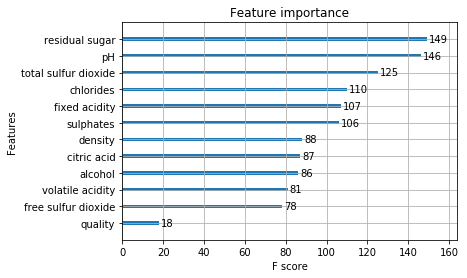

In [609]:
xgb.plot_importance(model)

## Neural Network

In [586]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(12,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [588]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,y_train,epochs=10,batch_size=1,verbose=0)

In [589]:
preds=np.round(model.predict(X_test))

### Check spread of output variable

(array([ 486.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1464.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

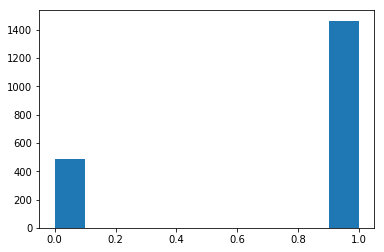

In [590]:
plt.hist(preds)

In [591]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(preds,y_test)
print("Accuracy score =" +str(acc))

Accuracy score =0.9948717948717949


In [592]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test,preds)

array([[ 484,    8],
       [   2, 1456]])

In [593]:
precision_score(y_test,preds)

0.994535519125683

In [594]:
recall_score(y_test,preds)

0.9986282578875172

In [595]:
f1_score(y_test,preds)

0.9965776865160849

In [596]:
cohen_kappa_score(y_test,preds)

0.9863529095596819

Therefore, the best accuracy that we have achieved in predicting wine type is 99.4%.

Now, we move to the next challenge of predicting wine quality.

# Predicting wine quality
Now, we shift focus to predicting the quality variable instead of the type of wine. We put back the Type column into the data DF and separate the quality column. This will be treated as a regression problem in Neural network

In [560]:
red=pd.read_csv('/Users/emilbiju/Downloads/winequality-red.csv',sep=';')
white=pd.read_csv('/Users/emilbiju/Downloads/winequality-white.csv',sep=';')
red['Type']=0
white['Type']=1
data=pd.concat([red,white],axis=0,ignore_index=True)

In [561]:
data['Type']=target
qual = data['quality']
del data['quality'] 

In [562]:
scaler=StandardScaler().fit(data)
data2=scaler.transform(data) 

In [563]:
data=pd.DataFrame(data2,columns=data.columns)

In [564]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,-1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-1.75019


## Neural Network for regression

In [565]:
X_train,X_test,y_train,y_test=train_test_split(data,qual,test_size=0.3,random_state=123)

In [554]:
model=Sequential()
model.add(Dense(64,input_dim=12,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1)) 

In [555]:
model.compile(loss='mse',metrics=['accuracy'],optimizer='adam')

In [556]:
model.fit(X_train,y_train,epochs=20,verbose=0)

In [344]:
preds_neur=np.round(model.predict(X_test))

In [345]:
acc=accuracy_score(preds_neur,y_test)
print("Accuracy score obtianed using neural network = "+str(acc))

Accuracy score obtianed using neural network = 0.5512820512820513


### Check the spread of classified values

(array([   5.,    0.,  498.,    0.,    0., 1099.,    0.,  341.,    0.,
           7.]), array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ],
       dtype=float32), <a list of 10 Patch objects>)

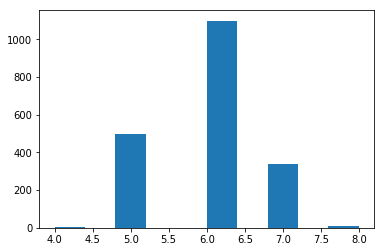

In [346]:
plt.hist(preds_neur)

### Expected spread of target variable

(array([ 10.,  78.,   0., 635.,   0., 849., 323.,   0.,  54.,   1.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

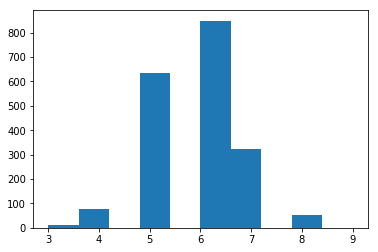

In [347]:
plt.hist(y_test)

### Evaluation of neural network using available metrics

In [348]:
from sklearn.metrics import r2_score
r2_score(y_test, preds_neur)

0.2229123547550972

In [349]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)

In [350]:
mse_value

0.5093393973203806

In [351]:
mae_value

0.5512820513126178

In [352]:
print(confusion_matrix(y_test,preds_neur))

[[  0   0   4   6   0   0   0]
 [  0   2  44  30   2   0   0]
 [  0   2 318 299  15   1   0]
 [  0   1 130 590 126   2   0]
 [  0   0   2 154 164   3   0]
 [  0   0   0  20  33   1   0]
 [  0   0   0   0   1   0   0]]


We notice that our attempt to use regression in neural network didn't work well. So, we try to define the problem as a multiclass classification problem

## Neural Network for multi class classification
To perform multi class classification with neural network, we make a data frame res with 7 columns representing the possibilities of the y_test variable (3,4,5,...,9). The column that represents the target variable in each row is assigned 1 and the rest are assigned 0.

In [566]:
res = pd.DataFrame(columns=['3','4','5','6','7','8','9'])
res['quality']=y_train
res.fillna(0,inplace=True)
for i in range(0,res.shape[0]):
    res[str(res.iloc[i,-1])].iloc[i]=1
del res['quality']

In [567]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=12))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(7,activation='sigmoid')) 

In [573]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [574]:
targ = pd.DataFrame(columns=['3','4','5','6','7','8','9'])
targ['quality']=y_test
targ.fillna(0,inplace=True)
for i in range(0,targ.shape[0]):
    targ[str(targ.iloc[i,-1])].iloc[i]=1
del targ['quality']

In [575]:
model.fit(X_train,res,epochs=20,verbose=0)

In [576]:
preds = model.predict(X_test)
preds = pd.DataFrame(preds,columns=targ.columns)
preds['class']=preds.idxmax(axis=1).apply(int)
acc_nn=accuracy_score(preds['class'],y_test)
print("Accuracy score of neural network = "+str(acc_nn))

Accuracy score of neural network = 0.5666666666666667


In [577]:
confusion_matrix(y_test,preds['class'])

array([[  0,   0,   6,   4,   0,   0,   0],
       [  0,   3,  55,  19,   1,   0,   0],
       [  0,   1, 434, 188,  12,   0,   0],
       [  0,   1, 212, 559,  77,   0,   0],
       [  0,   0,  10, 204, 109,   0,   0],
       [  0,   0,   2,  35,  17,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

We see some improvement in the performance. To get better results, we try other classification algorithms.

## Random Forest Classifier for multi-class classification
Here, we use the RF Classifier for the multi-class classification problem

In [370]:
model=RandomForestClassifier(n_estimators=100,max_depth=40)
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [329]:
acc=accuracy_score(y_test,preds)
print("Accuracy score obtianed using Random Forest Classifier = "+str(acc))

Accuracy score obtianed using Random Forest Classifier = 0.6682051282051282


Notice that the obtained accuracy is much higher in this case compared to the neural network

In [330]:
confusion_matrix(y_test,preds)

array([[  0,   1,   4,   5,   0,   0,   0],
       [  0,   7,  40,  30,   1,   0,   0],
       [  0,   1, 460, 170,   4,   0,   0],
       [  0,   0, 142, 665,  42,   0,   0],
       [  0,   0,   4, 161, 153,   5,   0],
       [  0,   0,   0,  21,  15,  18,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

In [371]:
preds

array([6, 6, 8, ..., 7, 5, 5])

## XGBoost for multi-class classification

In [374]:
xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,\
                          max_depth = 10, alpha = 0, n_estimators = 30)
model.fit(X_train,y_train)
preds=model.predict(X_test)

In [376]:
acc=accuracy_score(y_test,preds)
print("Accuracy score obtianed using XGBoost = "+str(acc))

Accuracy score obtianed using XGBoost = 0.6764102564102564


Therefore, the neural network doesn't seem to perform as well as the XGBoost Classifier. Therefore, the best accuracy we have achieved on predicting wine quality is 67.6% using XGBoost. This is far better than the accuracy that is achievable by random guessing, which will be approximately 20%.